In [109]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
df_original = pd.read_csv("Mall_Customers.csv")
df = df_original.copy()

### df info

In [111]:
### check dimension and features top 5
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [112]:
### check dtypes of features
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [113]:
### check missings
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### feature descriptives

In [114]:
### feature descriptives
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


### feature selection


In [115]:
### relevancy -> CustomerID is not important
df = df.drop(columns = 'CustomerID')

In [116]:
### correlations -> look for high correlations, but not too high
df.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


In [118]:
df = df.drop(columns=['Gender', 'Annual Income (k$)'])
df

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


### feature engineering

In [91]:
from sklearn.preprocessing import StandardScaler

In [119]:
### scaling -> features have different scales, so standardizing is a good idea
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

### k-means clustering

In [67]:
from sklearn.cluster import KMeans

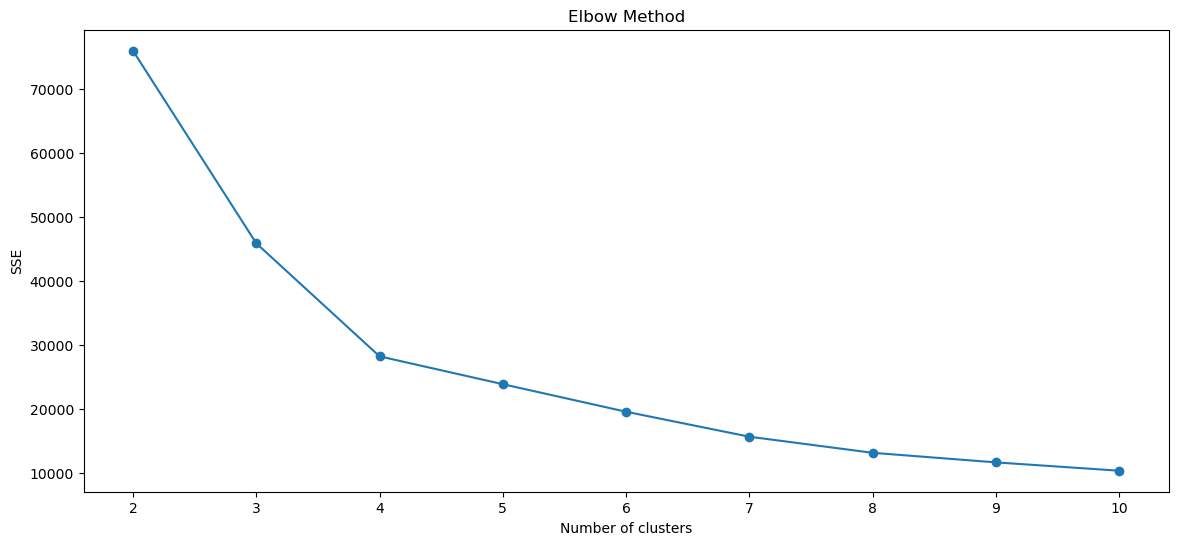

In [120]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [121]:
### fit model
model = KMeans(n_clusters=4, random_state=0).fit(df)


In [122]:
df['Cluster'] = model.labels_
df.groupby('Cluster').mean()

,Age,Spending Score (1-100)
Cluster,,
0,43.291667,15.020833
1,30.175439,82.350877
2,27.617021,49.148936
3,55.708333,48.229167
